## Telco Customer Churn Analysis
This notebook performs data cleaning and exploratory analysis on the Telco customer churn dataset. The goal is to understand churn-related patterns and prepare the data for modeling.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Roshni\Documents\telco-churn-ml\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()
df.describe(include="all")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning


In [19]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])

In [21]:
#replacing yes/no with 1,0
binary_cols = ["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [23]:
#replace "No internet service"/"No phone service" in service columns
service_cols = [
    "MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies"
]

for col in service_cols:
    df[col] = df[col].replace({"No internet service":"No","No phone service":"No"})
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [25]:
df = df.drop(columns=["customerID"])

In [27]:
df.info()
df.isna().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Exploratory Data Analysis (EDA)


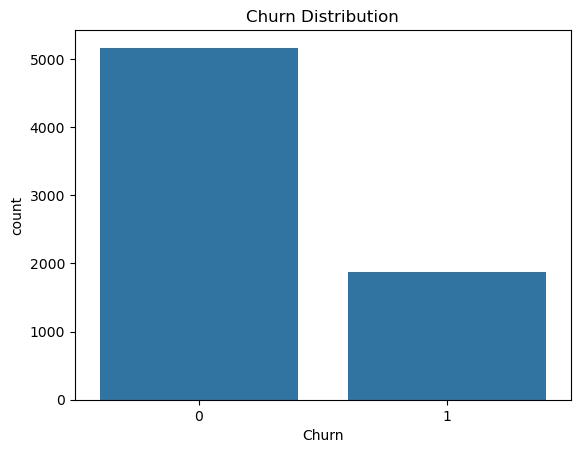

In [31]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True)

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


The number of churned customers is much lower than the number of customers who did not churn. This creates an imbalance in the dataset which is important to keep in mind while building the model.

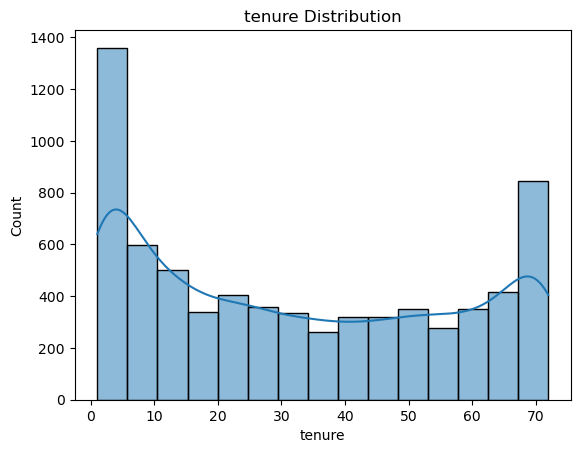

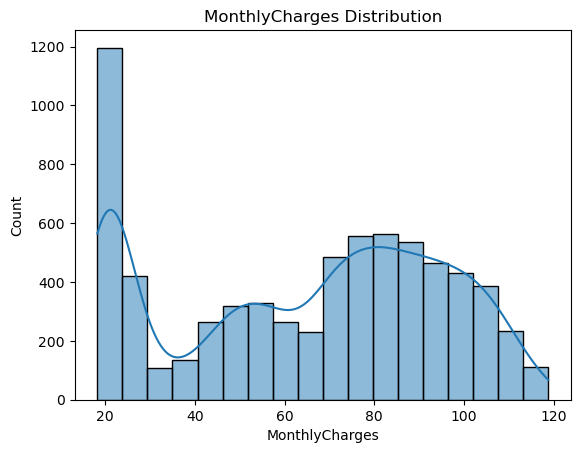

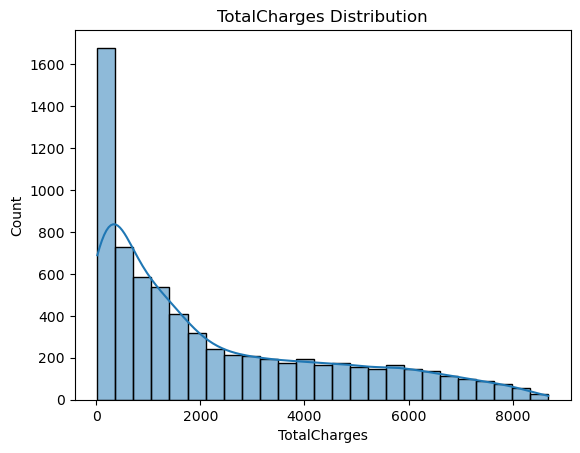

In [34]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


Tenure is heavily right-skewed, indicating many customers are relatively new. 
MonthlyCharges and TotalCharges vary widely, suggesting diverse customer segments.


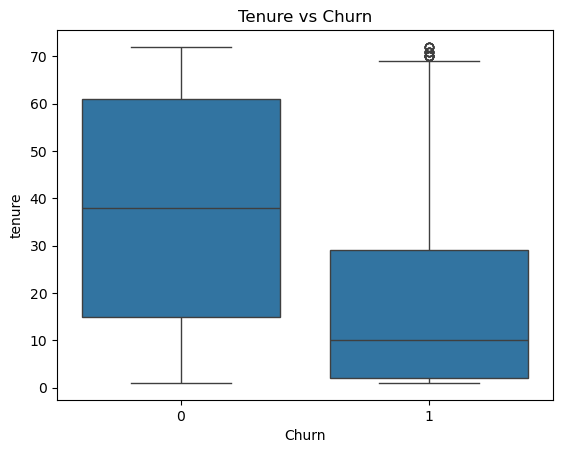

In [36]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

Customers with shorter tenure show higher churn levels, indicating early-stage churn risk.


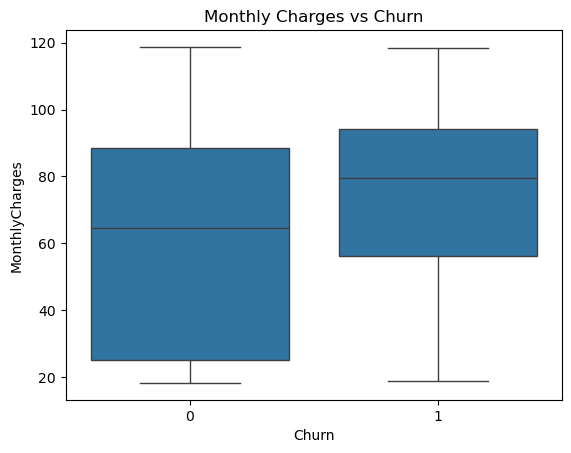

In [39]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


Customers with higher monthly charges tend to churn more frequently.


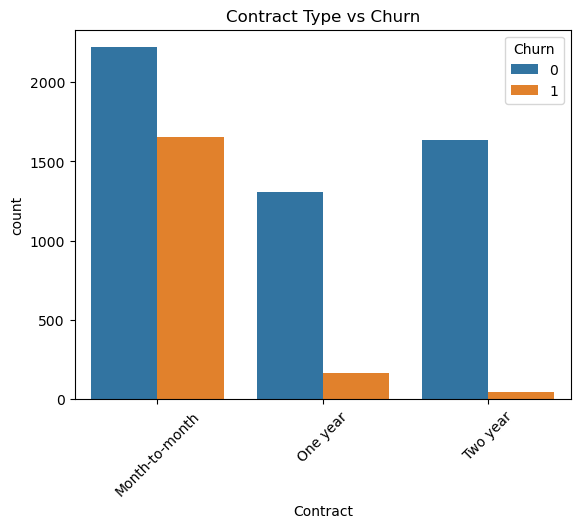

In [43]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


Month-to-month contract customers show higher churn, whereas longer-term contracts display better retention.


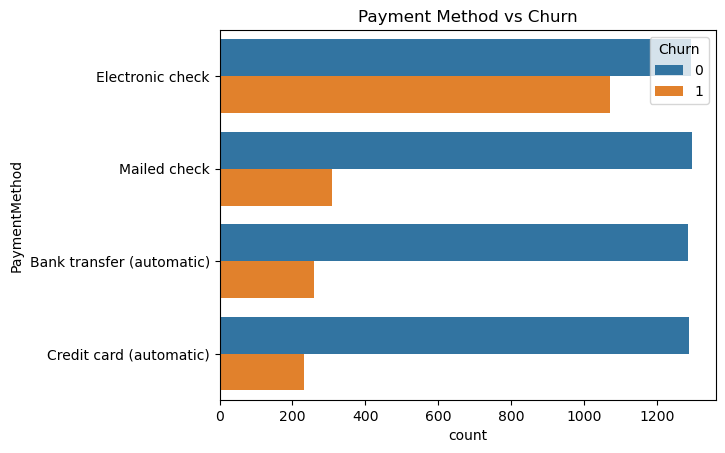

In [46]:
sns.countplot(y="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method vs Churn")
plt.show()


Electronic check users show higher churn, suggesting sensitivity to payment convenience or fees.


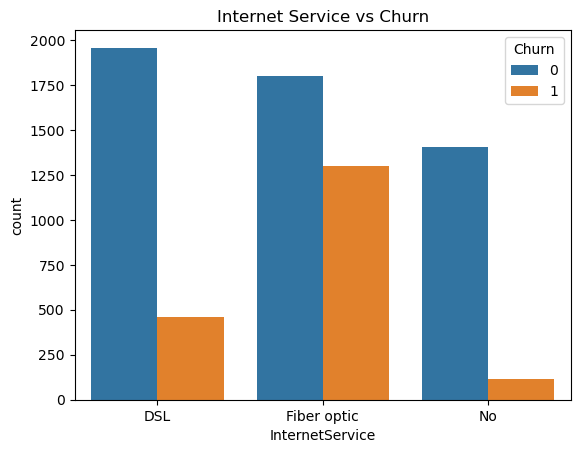

In [51]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()


Fiber optic customers show higher churn, possibly due to pricing or service quality issues.


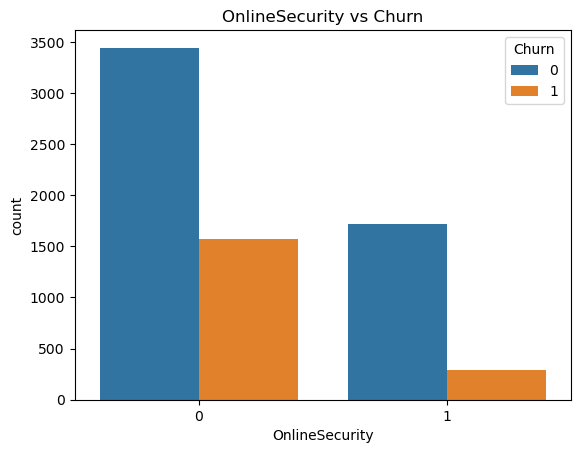

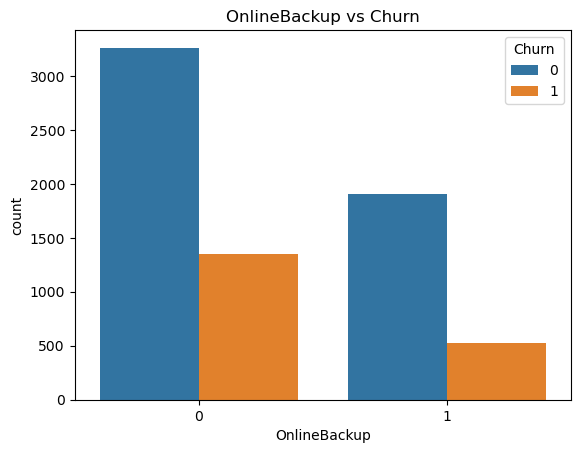

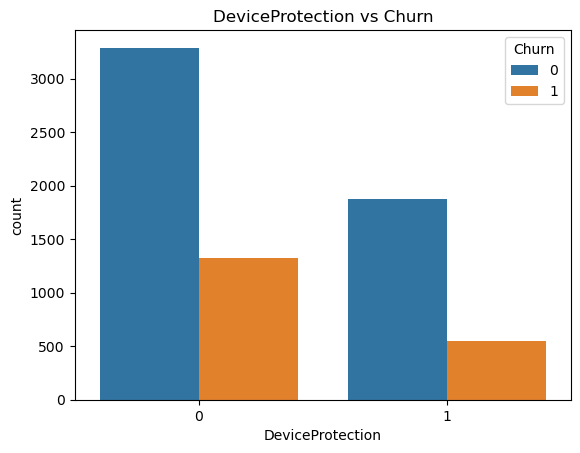

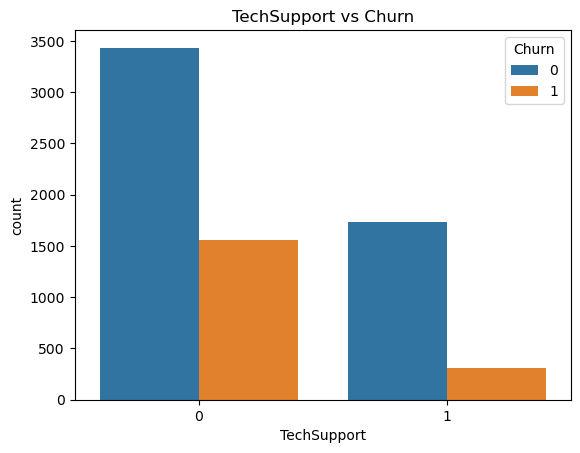

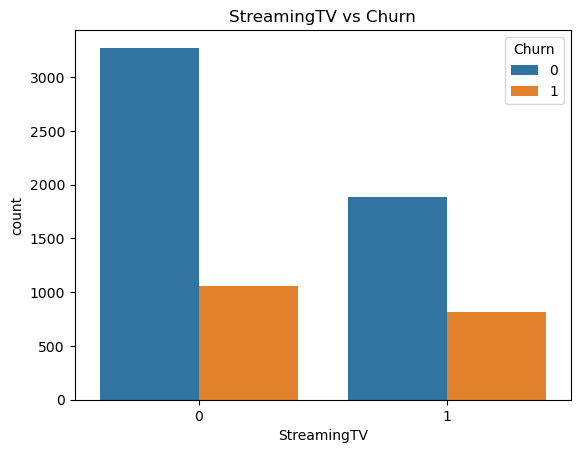

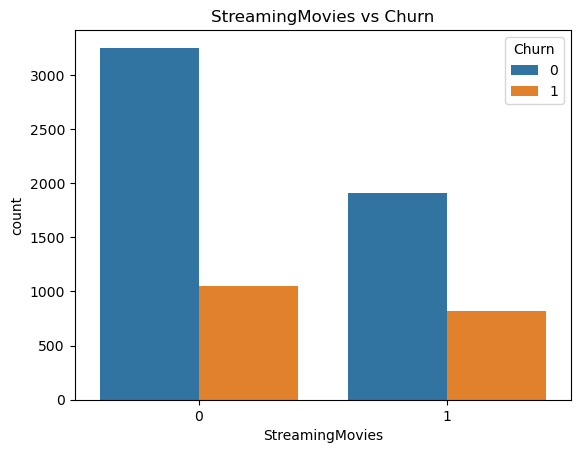

In [54]:
service_cols = [
    "OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies"
]

for col in service_cols:
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


Customers who do not subscribe to security or support services generally show higher churn.


## Feature Engineering


In [58]:
def tenure_group(x):
    if x <= 12:
        return "0-1 year"
    elif x <= 24:
        return "1-2 years"
    elif x <= 48:
        return "2-4 years"
    elif x <= 60:
        return "4-5 years"
    else:
        return "5+ years"

df["TenureGroup"] = df["tenure"].apply(tenure_group)


In [60]:
service_cols = [
    "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

df["NumServices"] = df[service_cols].sum(axis=1)


In [70]:
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"].replace(0, 1)


In [72]:
df["SeniorLongTenure"] = df["SeniorCitizen"] * (df["tenure"] > 24).astype(int)


In [74]:
df[["TenureGroup", "NumServices", "AvgMonthlySpend","SeniorLongTenure"]].head()

,TenureGroup,NumServices,AvgMonthlySpend,SeniorLongTenure
0,0-1 year,1,29.850000,0
1,2-4 years,3,55.573529,0
2,0-1 year,3,54.075000,0
3,2-4 years,3,40.905556,0
4,0-1 year,1,75.825000,0


## Preprocessing and Train–Test Split

In [78]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [80]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "NumServices", "AvgMonthlySpend"]
cat_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod",
    "TenureGroup", "SeniorLongTenure"
]


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [86]:
from sklearn.pipeline import Pipeline


### Logistic Regression


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred_lr = log_reg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.7953091684434968

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



###  Random Forest Classifier


In [91]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7882018479033405

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### XGBoost Classifier


In [98]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        eval_metric="logloss",
        random_state=42,
        use_label_encoder=False
    ))
])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\Roshni\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7654584221748401

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



### Model Comparison Table

In [101]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

try:
    results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)
except:
    pass

results


{'Logistic Regression': 0.7953091684434968,
 'Random Forest': 0.7882018479033405,
 'XGBoost': 0.7654584221748401}

## Model Explainability


In [112]:
# One-hot encoder
ohe = preprocessor.named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(cat_cols)

# Combined final feature names (numerical + encoded)
final_features = list(num_cols) + list(ohe_features)

len(final_features), final_features[:10]


(48,
 ['tenure',
  'MonthlyCharges',
  'TotalCharges',
  'NumServices',
  'AvgMonthlySpend',
  'gender_Female',
  'gender_Male',
  'SeniorCitizen_0',
  'SeniorCitizen_1',
  'Partner_0'])

In [116]:
##Logistic Regression Coefficients

lr_model = log_reg_pipeline.named_steps["model"]

coef_df = pd.DataFrame({
    "Feature": final_features,
    "Coefficient": lr_model.coef_[0]
}).sort_values("Coefficient", ascending=False)

coef_df.head(10)


,Feature,Coefficient
18,InternetService_Fiber optic,0.807880
32,Contract_Month-to-month,0.724656
45,TenureGroup_5+ years,0.519294
44,TenureGroup_4-5 years,0.378896
2,TotalCharges,0.279287
4,AvgMonthlySpend,0.250466
39,PaymentMethod_Electronic check,0.199565
13,PhoneService_0,0.157380
16,MultipleLines_1,0.106781
29,StreamingTV_1,0.081308


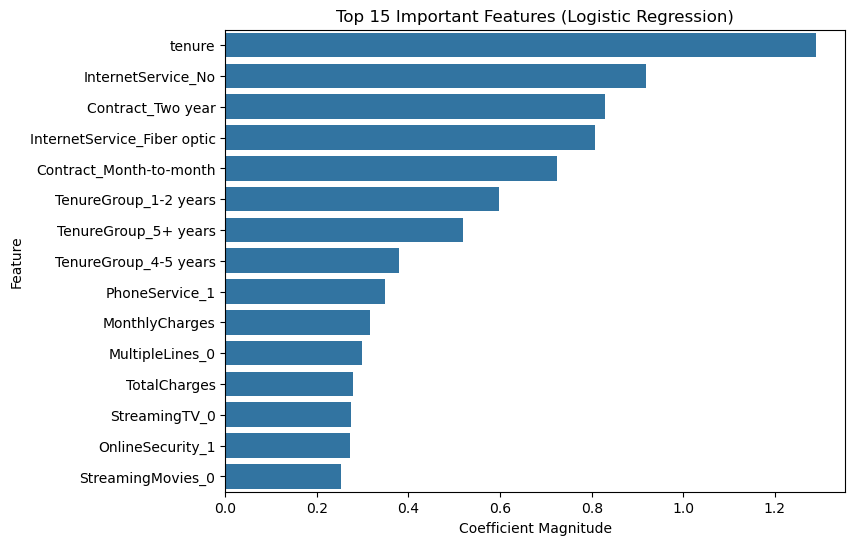

In [140]:
# Sort by absolute value (importance)
coef_df["AbsCoef"] = coef_df["Coefficient"].abs()
coef_sorted = coef_df.sort_values("AbsCoef", ascending=False)

# Plot top 15 features
top_lr = coef_sorted.head(15)

plt.figure(figsize=(8,6))
sns.barplot(x="AbsCoef", y="Feature", data=top_lr)
plt.title("Top 15 Important Features (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()


### Interpretation of Logistic Regression Feature Importance

The magnitude of the coefficients indicates how strongly each feature influences churn, 
while the sign (positive or negative) indicates the direction of the impact.

Key findings from the model:

- **Tenure** has the strongest influence: customers with short tenure are significantly 
  more likely to churn compared to long-term customers.
- **InternetService_No** and **Contract_Two year** have negative coefficients, showing 
  that customers with no internet service or long-term contracts are less likely to churn.
- **Fiber optic service** and **Month-to-month contracts** show strong positive influence, 
  meaning these customers churn more frequently.
- **Higher monthly spending** (MonthlyCharges and TotalCharges) increases churn risk.
- **Add-on services** like OnlineSecurity and Streaming services contribute moderately, 
  suggesting they help retain customers.

Overall, contract type, tenure, service type, and monthly spending emerge as the most 
important factors affecting churn.
